In [4]:
from google.colab import files
data=files.upload()

Saving Student_Performance.csv to Student_Performance.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [6]:
df=pd.read_csv('Student_Performance.csv')
df=pd.get_dummies(df,drop_first=True)
#df.head()

In [21]:
x=df.drop('Performance Index',axis=1)
y=df['Performance Index']
scaler=StandardScaler()
x=scaler.fit_transform(x)


In [22]:
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.3,random_state=0)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.5,random_state=0)

In [24]:
model = Sequential([
    tf.keras.Input(shape=(x_train.shape[1],)),
    Dense(10, activation='relu',kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu',kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu',kernel_regularizer=l2(0.01)),
    Dense(16, activation='relu',kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear',kernel_regularizer=l2(0.01))
])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,389 (13.24 KB)

 Trainable params: 3,389 (13.24 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    tf.keras.optimizers.Adam(learning_rate=.01),
    loss='mse',
    metrics=['mse']

)

In [26]:
x_train=x_train.astype(float)
y_train=y_train.astype(float)
x_cv=x_cv.astype(float)
y_cv=y_cv.astype(float)
model.fit(x_train,y_train,epochs=100,validation_data=(x_cv,y_cv),batch_size=32)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 903.9386 - mse: 902.8711 - val_loss: 20.3875 - val_mse: 19.4198
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 15.9148 - mse: 14.9434 - val_loss: 9.1299 - val_mse: 8.0862
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6366 - mse: 6.5645 - val_loss: 6.5971 - val_mse: 5.5286
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.7977 - mse: 5.7437 - val_loss: 5.9606 - val_mse: 4.9479
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.3067 - mse: 5.3017 - val_loss: 7.1310 - val_mse: 6.1726
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.5490 - mse: 5.5910 - val_loss: 5.9491 - val_mse: 5.0048
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.8128 - mse: 5.8823 - val_loss: 5.4731 - val_mse: 4.5725
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.1452 - mse: 5.2542 - val_loss: 7.7178 - val_mse: 6.8408
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━

In [27]:
x_test=x_test.astype(float)
predections=model.predict(x_test)
mse_nn=mean_squared_error(y_test,predections)
print(f"predection:{predections[0:5]}\true value:{y[0:5]}\n j_test:{mse_nn}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
predection:[[47.264095]
 [73.79074 ]
 [72.92581 ]
 [41.4447  ]
 [61.94891 ]]	rue value:0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64
 j_test:4.192929064500005


In [28]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
y_pred=linear_model.predict(x_test)
mse_linear=mean_squared_error(y_test,y_pred)
print(f"predection:{y_pred[0:5]}\true value:{y[0:5]}\n j_test:{mse_linear}")

predection:[47.37544114 73.47290645 72.87782609 41.65774108 62.13109883]	rue value:0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64
 j_test:3.939599026075534


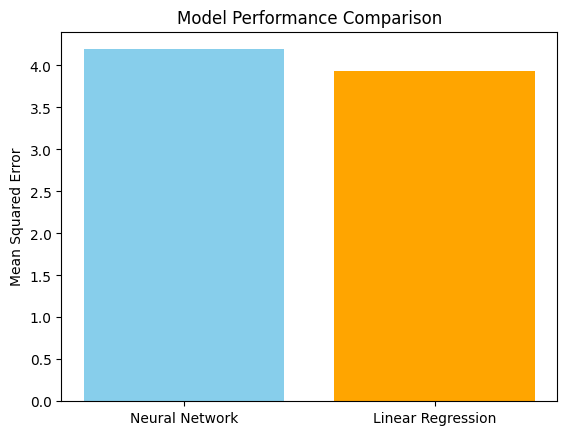

In [29]:
import matplotlib.pyplot as plt

# Assuming you already have:
# mse_nn: from your NN
# mse_linear: from scikit-learn

models = ['Neural Network', 'Linear Regression']
mse_values = [mse_nn, mse_linear]

plt.bar(models, mse_values, color=['skyblue', 'orange'])
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison')
plt.show()
